# 2016年美国共享单车活动快照

## 目录
- [简介](#intro)
- [提出问题](#pose_questions)
- [数据收集和整理](#wrangling)
  - [浓缩骑行数据](#condensing)
- [探索性数据分析](#eda)
  - [统计数据](#statistics)
  - [可视化界面](#visualizations)
- [进行你自己的分析](#eda_continued)
- [总结](#conclusions)

<a id='intro'></a>
## 简介

> **小贴士**: 像这样的引用部分旨在为学员提供实用指导，帮助学员了解并使用 Jupyter notebook

过去十年里，世界各城市的共享单车系统不仅不断增多，也越来越受人们欢迎。用户可借助共享单车系统来租赁单车，进行通常在 30 分钟以内的短途骑行。由于信息科技的崛起，用户能够方便地找到所用系统的停车点，实现单车解锁或归还操作。不仅如此，信息科技还带来了大量数据，有了这些数据，我们就能研究共享单车系统的使用情况。

在本项目中，你将进行探索性数据分析。你所需分析的数据源自 [Motivate](https://www.motivateco.com/)，这是一家为美国诸多大城市提供共享单车系统的供应商。你将比较三大城市：纽约市、芝加哥和华盛顿特区的系统使用情况，并观察每个系统的长期注册用户和短期临时用户之间有无区别。

<a id='pose_questions'></a>
## 提出问题

在查看共享单车数据之前，你得先明确自己想了解共享单车数据的哪些方面，并就此提出问题。打个比方，假如你是 Motivate 的员工，为了做出更明智的商业决策，你会想了解什么信息呢？假如你是共享单车服务的对象，那么什么样的因素会影响你对这类服务的使用偏好呢？

**问题 1**: 写出至少两个你觉得能用数据解决的共享单车相关问题。

**答案**：1,共享单车的合理投放；2，长期注册用户的收费优惠方案；

> **小贴士**: 双击上框，文本就会发生变化，所有格式都会被清除，以便你编辑该文本块。该文本块是用 [Markdown](http://daringfireball.net/projects/markdown/syntax)编写的，该语言使用纯文本语法，能用页眉、链接、斜体等来规范文本格式。在纳米学位课程中，你也会用到 Markdown。编辑后，可使用 **Shift** + **Enter** 或 **Shift** + **Return** 运行上该框，使其呈现出编辑好的文本格式。

<a id='wrangling'></a>
## 数据收集与整理

现在是时候收集并探索数据了。在本项目中，我们将重点关注所选城市：纽约市、芝加哥、华盛顿特区 2016 年的个人骑行记录。每座城市均有相关页面供我们随时下载骑行数据：

- 纽约市(Citi Bike): [链接](https://www.citibikenyc.com/system-data)
- 芝加哥 (Divvy): [链接](https://www.divvybikes.com/system-data)
- 华盛顿特区 (Capital Bikeshare): [链接](https://www.capitalbikeshare.com/system-data)

访问上述网页，你就会发现各城市提供数据的方式有所不同。芝加哥每两年更新一次数据，华盛顿特区则每个季度更新一次，纽约市则是每月一更。**不过你无需亲自下载数据。** 我们已为你收集好了数据并存放到项目文件的 `/data/` 文件夹中了，虽然各城市 2016 年的原始数据散布在多个文件中，但 `/data/` 文件夹里的文件已分别将当年各城市的所有骑行数据整合到一个文件中了。我们已为你完成了一些数据整理操作，处理了各城市数据时间戳格式不一致的问题。除此之外，我们还移除了原始数据 2% 的随机样本，以减少探索障碍。

**问题 2**: 尽管如此，我们要研究的数据还有很多，因此，我们最好先观察各目标分析城市的某一则记录。运行下方第一个代码框，加载一些分析所需的包和函数，然后完成第二个代码框，使其分别输出各城市的第一条骑行记录（也即每个数据文件的第二行）。

> **小贴士**: 运行代码框的方法与编辑上方的 Markdown 框的格式类似，你只需点击代码框，按下键盘快捷键 **Shift** + **Enter** 或 **Shift** + **Return** ，或者你也可先选择代码框，然后点击工具栏的 **运行** 按钮来运行代码。运行代码框时，相应单元左侧的信息会出现星号，即 `In [*]:`，若代码执行完毕，星号则会变为某个数字，如 `In [1]`。如果代码运行后有输出结果，输出将会以 `Out [1]:` 的形式出现，其中的数字将与 "In" 中的数字相对应。

In [72]:
## 导入所有必要的包和函数。
import csv # 读写 csv 文件
from datetime import datetime # 日期解析操作
from pprint import pprint # 用于输出字典等数据结构
                          # 这比 base print 函数要好用。

In [73]:
def print_first_point(filename):
    """
    本函数会输出并返回指定的 csv 文件 （含页眉行）的第一个数据点（即文件的第二行）。
    """
    # 输出城市名以供参考
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## 待办：用 csv 库来设置一个 DictReader 对象。##
        ## 见 https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        
        ## 待办：对 DictReader 对象使用函数     ##
        ## 从而读取数据文件的第一条骑行记录并将其存储为一个变量     ##
        ## 见 https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = next(trip_reader)
        
        ## 待办：用 pprint 库来输出第一条骑行记录。 ##
        ## 见 https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
    # 输出城市名和第一条骑行记录以备测试
    return (city, first_trip)

# 各城市的文件列表
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# 输出各文件的第一条骑行记录，并将其储存在字典中
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

要是一切都填写正确的话，你就能看到下方输出了每座城市的名字（解析数据文件名而得），而其中第一条骑行记录也已解析成字典的格式。等你设置好`DictReader`对象，数据文件的第一行通常就会被处理为列名，文件其余的行则将以这些列名作为关键字，这是因为每一行都生成了一个字典对象。

这些可读性很强的标签对我们访问大量数据十分实用，有了这些，我们就无需使用数字索引，比如，如果我们有一条骑行记录储存在变量 `row`里，那就可以用 `row['duration']` 来获得骑行时长，无需使用 `row[0]`。

<a id='condensing'></a>
### 浓缩骑行数据

你应该能从上方的输出观察到每座城市提供的信息是有差别的，就算是信息相同的部分，列名和格式有时也不尽相同。为了尽可能方便真正的探索操作，我们应当对数据进行修剪和清理。清理数据以保证各城市数据格式一致，修剪数据则能让我们把重心完全放到最关心的那部分数据上，从而减小探索难度。

你将生成新的数据文件，该文件需包括你感兴趣的五个骑行数据值：骑行时长、起始月份、起始小时、周几以及用户类型。每座城市的这五个值都可能需要额外的整理操作，这取决于各城市的数据差异：

- **时长**：该值可能以秒数（纽约市、芝加哥）或毫秒数（华盛顿特区）表示，但就分析而言，分析单位为分钟更佳，所以如果能将所有骑行时长都以分钟表示就好了。
- **月份**, **小时**, **周几**：季节、一天的什么时候以及是否周末都有可能影响骑客量，请用骑行起始时间来获取这些值。纽约市数据的时间戳记录了秒数，而华盛顿特区和芝加哥的并没有。 此处使用 [`datetime`](https://docs.python.org/3/library/datetime.html) 包应大有帮助，该包可实现必要的转换操作。
- **用户类型**： 共享单车系统的注册用户可能与临时用户有不同的使用模式。华盛顿特区将其用户分为两种：‘注册用户’ ——这类用户买了较长时期的会员，如年度会员或月度会员；‘临时用户’——这类用户所购买的骑行时间较短，如只有 24 小时或 3 天。纽约市和芝加哥的数据则用 ‘会员’ 和 ‘散客’ 来区分这两者。为了保证数据的一致性，你需要修改华盛顿特区的标签，使其与另外两座城市的标签相同。


**问题 3a**：完成下方代码框中的辅助函数，完成上述各项清理任务。

In [74]:
def duration_in_mins(datum, city):
    """
    将一个字典作为输入，该字典需包含一条骑行记录（数据）
    及记录城市（城市）的信息，返回该骑行的时长，使该时长以分钟为单位。
    
    记住，华盛顿特区是以毫秒作为计量单位的，而芝加哥和纽约市则
    以秒数作为单位。
    
    提示：csv 模块会将所有数据读取为字符串，包括数值，
    所以转换单位时，你需要用一个函数来将字符串转换为合适的数值类型。
    见 https://docs.python.org/3/library/functions.html
    """
    
    # 请在此处写出代码
    if city == 'Washington':
        duration = int(datum['Duration (ms)'])/1000/60
    else:
        duration = int(datum['tripduration'])/60

    return duration


# 测试代码是否奏效，若所有断言都没问题，则不应有输出出现。
# 至于字典 `example_trips` 
# 则是在你输出每个数据源文件的第一条骑行数据时生成的。
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [75]:
def time_of_trip(datum, city):
    """
    将一个字典作为输入，该字典需包含一条骑行记录（数据）
    及记录城市（城市）的信息，返回该骑行进行的月份、小时及周几这三个值。
    
    
    记住，纽约市以秒为单位，华盛顿特区和芝加哥则不然。
    
    提示：你需要用 datetime 模块来将原始日期字符串解析为
    方便提取目的信息的格式。
    见 https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    # 请在此处写出代码
    if city == 'NYC':
        start_time = datetime.strptime(datum['starttime'],'%m/%d/%Y %H:%M:%S')
    elif city == 'Chicago':
        start_time = datetime.strptime(datum['starttime'],'%m/%d/%Y %H:%M')
    elif city == 'Washington':
        start_time = datetime.strptime(datum['Start date'],'%m/%d/%Y %H:%M')
        
    month = start_time.month
    hour = start_time.hour
    day_of_week = start_time.strftime('%A')
    
    return (month, hour, day_of_week)


# 测试代码是否奏效，若所有断言都没问题，则不应有输出出现。
# 至于字典 `example_trips`
# 则是在你输出每个数据源文件的第一条骑行数据时生成的。
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [76]:
def type_of_user(datum, city):
    """
    将一个字典作为输入，该字典需包含一条骑行记录（数据）
    及记录城市（城市）的信息，返回进行该骑行的系统用户类型。
    
    
    记住，华盛顿特区的类名与芝加哥和纽约市的不同。
    
    """
    
    # 请在此处写出代码
    if city == 'Washington':
        user_type = datum['Member Type']
        if user_type=='Registered':
            user_type='Subscriber'
        else:
            user_type='Customer'
    else:       
        user_type = datum['usertype']      
    
    return user_type


# 测试代码是否奏效，若所有断言都没问题，则不应有输出出现。
# 至于字典 `example_trips`
# 则是在你输出每个数据源文件的第一条骑行数据时生成的。
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**问题 3b**: 现在，使用你在上方编写的辅助函数来为每座城市生成数据浓缩文件，该文件将只包括上述数据区。在 `/examples/` 文件夹里，你将看到转换前后的数据文件示例，该示例来自[旧金山湾区共享单车](http://www.bayareabikeshare.com/open-data)。请确保你的输出结果与示例文件具备一致的格式。

In [77]:
def condense_data(in_file, out_file, city):
    """
    本函数会从指定的输入文件中提取全部数据
    并在指定的输出文件中写出浓缩数据。
    城市参数决定输入文件的解析方式。
    
    提示：参考下框以明确参数结构！
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # 设置 csv DictWriter 对象——该对象需将第一列列名
        # 作为 "fieldnames" 参数
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## 待办：设置 csv DictReader 对象##
        trip_reader = csv.DictReader(f_in)

        # 收集并处理每行的数据
        for row in trip_reader:
            # 设置一个字典来存储清理和修剪后的数据点的值
            new_point = {}
            ## 待办：使用辅助函数来从原始数据字典中获取清理数据##

            ## 注意字典 new_point 的关键词应与 ##
            ## 上述 DictWriter 对象设置的列名一致。        ##
            new_point['duration'] = duration_in_mins(row, city)
            new_point['month'], new_point['hour'], new_point['day_of_week'] = time_of_trip(row, city)
            new_point['user_type'] = type_of_user(row, city)
            
            trip_writer.writerow(new_point)
            ## 待办：在输出文件中写出处理后的信息。##
            ## 见 https://docs.python.org/3/library/csv.html#writer-objects ##
            
            

In [78]:
# 运行下框以测试效果
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **小贴士**：对 Jupyter Notebook 进行保存，运行代码块所得的输出结果也会得到保存，不过，一旦开始了新节，工作空间的状态就会被重置，所以你得运行上一节涉及的所有必要代码块，重建变量和函数，方能找回上次离开的进度。

<a id='eda'></a>
## 探索性数据分析

现在你已经收集并整理了数据，可以开始探索数据了。在本节中，你将编写一些代码来对数据进行描述统计。我们还将为你介绍 `matplotlib` 库，以便你为数据创建一些基本直方图。

<a id='statistics'></a>
### 统计数据

首先，我们来进行一些基本统计。下方的第一个框里包括了一个函数，该函数会用 csv 模块来对给定的数据文件进行迭代处理，并返回会员和散客的骑行次数。第二个框则会运行 `/examples/` 文件夹里湾区示例数据中的函数。修改下框，回答下列问题。

**问题 4a**：哪座城市的骑行次数最多？哪座城市会员进行的骑行次数占比最高？哪座城市散客进行的骑行次数占比最高？

**答案**：NYC的骑行次数最多（276798）；NYC的会员骑行次数占比最高（88.8%）；Chicago散客进行的骑行占比最高（23.8%）

In [79]:
def user_duration_list(filename, user_type = 'All'):
    """
    本函数会读取一个骑行数据文件，以及用户类型。
    用户类型默认为 All，返回所有用户的骑行时长列表。
    对于特定的用户类型——会员或散客，返回该类型用户的骑行时长列表。
    """
    with open(filename, 'r') as f_in:
        # 设置 csv reader 对象
        reader = csv.DictReader(f_in)
        # 初始化列表
        duration_list = []

        # 如果是全部用户
        if user_type == 'All':
            for row in reader:
                duration_list.append(float(row['duration']))

        # 如果是特定类型的用户
        else:
            for row in reader:
                if row['user_type'] == user_type:
                    duration_list.append(float(row['duration']))
        return duration_list
    
def number_of_trips(filename):
    """
    本函数会读取一个骑行数据文件，分别报告
    会员、散客和所有系统用户的骑行次数。
    """ 
    # 初始化计数变量
    n_subscribers = len(user_duration_list(filename, 'Subscriber'))
    n_customers = len(user_duration_list(filename, 'Customer'))
    n_total = len(user_duration_list(filename))
        
    # 将结果作为数组返回出来
    return(n_subscribers, n_customers, n_total)

In [80]:
## 修改此框及上框，回答问题 4a。##
## 记得运行你在问题 3 中创建的数据文件清理函数。     ##

data_file = './examples/BayArea-Y3-Summary.csv'
print(number_of_trips(data_file))


(5666, 633, 6299)


In [81]:
trip_summary_by_city = {}
for city, filenames in city_info.items():
    n_subscribers, n_customers, n_total = number_of_trips(filenames['out_file'])
    datum = {'n_total':n_total,'percentage_subscriber':n_subscribers/n_total,'percentage_customers':n_customers/n_total}
    trip_summary_by_city[city] = datum
    
pprint(trip_summary_by_city)   

{'Chicago': {'n_total': 72131,
             'percentage_customers': 0.23774798630269925,
             'percentage_subscriber': 0.7622520136973008},
 'NYC': {'n_total': 276798,
         'percentage_customers': 0.10905064342950455,
         'percentage_subscriber': 0.8883590199351151},
 'Washington': {'n_total': 66326,
                'percentage_customers': 0.21971775774206193,
                'percentage_subscriber': 0.7802822422579381}}


> **小贴士**：要在 notebook 里添加框，你可以用上方菜单栏里的  "在上方插入框" 和 "在下方插入框" 功能，也可以用工具栏的相关图标来添加新框，那里还有其它图标可在文件中上移或下移框。新框默认为代码框。你还可以在框菜单或工具栏下拉菜单中为选中框指定类型（如代码框或 Markdown 框）。

现在，你需要写下自己的代码，继续研究数据的属性。

**问题 4b**：共享单车系统是为短途骑行者而设的。大多数时候，用户在 30 分钟内骑行无需额外付费，若是超过该时长，则需支付超时费用。那么，各城市的平均骑行时长是多少？各城市骑行时长超过 30 分钟的比例又是多少？

**答案**：各城市平均骑行时长 - NYC：15.8m ，Chicago：16.6m ，Wangshington：18.9m。各城市骑行时长超过30分钟比例为 - NYC：7.3%，Chicago：8.3%，Wangshington：10.8%

In [82]:
## 使用本框及新框来回答问题 4b。               ##
##                                                                      ##
## 提示：csv 模块会将所有数据读取为字符串，包括数值。 ##
## 因此，在统计数据之前，你需要用函数将字符串转换为      ##
## 合适的数值类型。         ##
## 小贴士：在湾区示例数据中，平均骑行时长为 14 分钟，##
## 骑行时长多于 30 分钟的数据占比 3.5%。                      ##

def trip_mean_time(filename):
    """
    本函数会读取一个骑行数据文件，分别报告
    用户骑行平均时间和超过30分钟的占比。
    """
    duration_list = user_duration_list(filename)
    long_duration_list = [x for x in duration_list if x>30]
    
    # 将结果作为数组返回出来
    return(sum(duration_list)/len(duration_list), len(long_duration_list)/len(duration_list))
    
data_file = './examples/BayArea-Y3-Summary.csv'
print(trip_mean_time(data_file))    

(14.038656929671422, 0.035243689474519765)


In [83]:
trip_meantime_by_city = {}
for city, filenames in city_info.items():
    t_trip_meantime, p_long_trip = trip_mean_time(filenames['out_file'])
    datum = {'t_trip_meantime':t_trip_meantime,'p_long_trip':p_long_trip}
    trip_meantime_by_city[city] = datum
    
pprint(trip_meantime_by_city)   

{'Chicago': {'p_long_trip': 0.08332062497400562,
             't_trip_meantime': 16.563629368787335},
 'NYC': {'p_long_trip': 0.07302437156337835,
         't_trip_meantime': 15.81259299802294},
 'Washington': {'p_long_trip': 0.10838886711093688,
                't_trip_meantime': 18.93287355913721}}


**问题 4c**：从骑客量的角度更深入地挖掘骑行时长问题。选择一座城市，研究该城市哪种系统用户的平均骑行时间更长？是会员还是散客？

**答案**：所有城市中散客的骑行平均时长都大大高于会员。例如Washington中，散客平均骑行为41.7m，而会员为12.5m。

In [84]:
## 使用本框及新框来回答问题 4c。##
## 如果你还没这么做过，你可以考虑修改之前的代码   ##
## 利用一些可重复利用的函数。                            ##
##                                                                     ##
## 小贴士：在海湾示例数据中，你应该发现    ##
## 会员平均骑行时长为 9.5 分钟，散客平均骑行时长则为##
## 54.6 分钟，其它城市区别也这么大吗？     ##
##                                                ##
def trip_meantime_by_usertype(filename):
    """
    本函数会读取一个骑行数据文件，分别报告
    会员、散客的骑行平均时长。
    """
    with open(filename, 'r') as f_in:
        # 设置 csv reader 对象
        reader = csv.DictReader(f_in)
        
        # 初始化计数变量
        n_subscribers = 0
        n_customers = 0
        t_subscribers = 0
        t_customers = 0
        
        # 计算骑行类型
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
                t_subscribers += float(row['duration'])
            else:
                n_customers += 1
                t_customers += float(row['duration'])
        
        
        # 将结果作为数组返回出来
        return(t_subscribers/n_subscribers, t_customers/n_customers)

data_file = './examples/BayArea-Y3-Summary.csv'
print(trip_meantime_by_usertype(data_file))     

(9.512633839275217, 54.55121116377032)


In [85]:
trip_meantime_for_usertype_by_city = {}
for city, filenames in city_info.items():
    t_trip_meantime_subscriber, t_trip_meantime_customer = trip_meantime_by_usertype(filenames['out_file'])
    datum = {'t_trip_meantime_subscriber':t_trip_meantime_subscriber,'t_trip_meantime_customer':t_trip_meantime_customer}
    trip_meantime_for_usertype_by_city[city] = datum
    
pprint(trip_meantime_for_usertype_by_city)   

{'Chicago': {'t_trip_meantime_customer': 30.979781133982506,
             't_trip_meantime_subscriber': 12.067201690250076},
 'NYC': {'t_trip_meantime_customer': 32.77595139473187,
         't_trip_meantime_subscriber': 13.680790523907177},
 'Washington': {'t_trip_meantime_customer': 41.67803139252976,
                't_trip_meantime_subscriber': 12.528120499294745}}


<a id='visualizations'></a>
### 可视化界面

你统计出来的最后一组值应该会出现相当有趣的结果：会员平均骑行时长远低于 30 分钟，而散客的平均骑行时长则的的确确 _超过_了 30 分钟！要是能观察骑行时长的分布，应该会很有趣，为此，我们需要引入一个新库，即 `matplotlib`。请运行下框，加载该库以生成示例图。

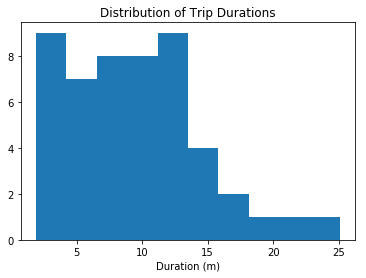

In [86]:
# 加载库
import matplotlib.pyplot as plt

# 这个'咒语'能展示图形。
# 内联 notebook，详见：
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# 直方图示例，数据来自湾区样本
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

在上框中，我们收集了五十个骑行时长数据，制成列表，并将该列表作为 `.hist()` 函数的第一个参数，该函数会进行统计并生成绘图对象，以便生成直方图，但我们需要执行 `.show()` 函数才能呈现统计图。`.title()` 和 `.xlabel()` 函数则提供一些标签，以便说明统计图的背景。

现在你可以使用这些函数，为你在问题 4c 所选城市的骑行时长创建直方图。请先不要将会员和散客的统计分开，你现在只需统计所有骑行时长并生成统计图即可。

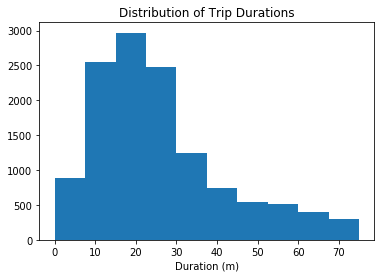

In [87]:
## 使用本框及新框来收集所有骑行时长并制成列表。##
## 使用 pyplot 函数来为骑行时长生成直方图。 ##
def all_duration(filename):
    """
        return a list of durations for each trip
    """
    with open(filename,'r') as file_in:
        reader = csv.DictReader(file_in)
        durations = []
        for row in reader:
            durations.append(float(row['duration']))
    
    return durations

duration_list = user_duration_list(city_info['Washington']['out_file'])
plt.hist(durations, range=[0,75])
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

如果你按示例的用法来用 `.hist()` 和 `.show()` 函数，就可能得到一张完全在意料之外的统计图，该图左侧将有一条极长的柱形，相邻的第二条柱形则可能十分短小，而且中间和右边将空出许多空间，这个时候你可以看看 x 轴的时长值，你会发现，数据里有些高度异常的极端值，不过你不需要重新处理数据，只需为 `.hist()` 函数再加一些参数，限制绘图数据的范围即可，函数相关文件请见[[这里]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**问题 5**：用 `.hist()` 函数的参数来为所选城市的会员骑行时长绘制分布图，并单独为散客做同样的操作。限制统计图的范围，仅绘制骑行时长小于 75 分钟的数据。另外，你可以设置每条柱形之间有五分钟的间隔。在每组数据中，各分布图的峰值分别在哪？你会如何描述每个分布图的形状？

**答案**：以Wangshington为例，会员的骑行时长分布图峰值在10分钟，而散客的骑行时长分布图峰值在25分钟。两个分布图均为正偏态（或右偏态），右侧的尾部更长，分布的主体集中在左侧。

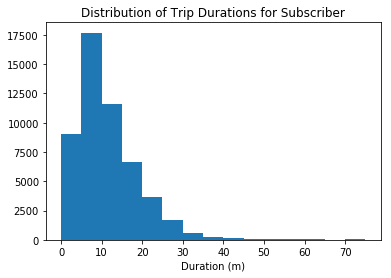

In [88]:
## 使用本框及新框来回答问题 5##
def all_durations_by_user_type(filename, user_type):
    """
        return a list of durations for each trip by user type
    """
    with open(filename,'r') as file_in:
        reader = csv.DictReader(file_in)
        durations = []
        for row in reader:
            if user_type == row['user_type']:
                durations.append(float(row['duration']))
    
    return durations

durations = all_durations_by_user_type(city_info['Washington']['out_file'],'Subscriber')
plt.hist(durations, bins=15,range=[0,75])
plt.title('Distribution of Trip Durations for Subscriber')
plt.xlabel('Duration (m)')
plt.show()


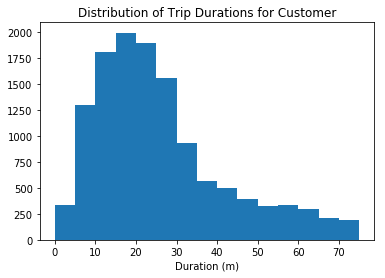

In [89]:
durations = all_durations_by_user_type(city_info['Washington']['out_file'],'Customer')
plt.hist(durations,bins=15,range=[0,75])
plt.title('Distribution of Trip Durations for Customer')
plt.xlabel('Duration (m)')
plt.show()

<a id='eda_continued'></a>
## 进行你自己的分析

到目前为止，你已经对手头的数据进行了初步的探索，对比了三座美国城市的相应骑行量，以及会员和散客的骑行比例，你还选取了其中一座城市，从一般骑行时长的角度来研究会员和散客的区别，接下来的探索，你就要自己选择研究方向了，以下是一些探索方向的建议：

- 不同月份或季度的骑客量有什么区别？哪个月份/季度的骑客量最高？会员骑行量与散客骑行量之比会受月份或季度的影响吗？
- 周末和工作日的系统用户骑行模式有何区别？哪一天会员更可能使用骑行系统？散客呢？平均骑行时长会受一周内不同日期的影响吗？
- 一天内的哪个时候系统使用最频繁？会员和散客的使用模式有区别吗？

若你在问题 1 回答中提出的任何问题与上述参考类似，那现在就是研究这些的好时机。作为研究的一部分，你需要创建可视化界面，如果不想创建直方图，你可以参考 [Pyplot 文件](https://matplotlib.org/devdocs/api/pyplot_summary.html)。值得一提的是，如果你想为分类变量的不同值绘制统计图（如城市、用户类型），柱形图会大有帮助。[`.bar()`文件页面](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar)底部具备相关示例链接，可供你参考，助你创建自己需要的统计图。

**问题 6**：探索另一个可用数据回答的问题，继续研究。在下方写下你想探索的问题，你的研究至少应包括两个变量，对比两组数据并使用一个可视化界面。

**答案**: 研究系统在一天内不同时段的使用频繁程度。通过对比分时数据发现每天有两个骑行高峰，分别是早上8点和下午17点。这两个高峰均是由会员所造成的，而散客的骑行高峰集中在每天的14点到16点之间。三个城市的数据都可印证该结论。

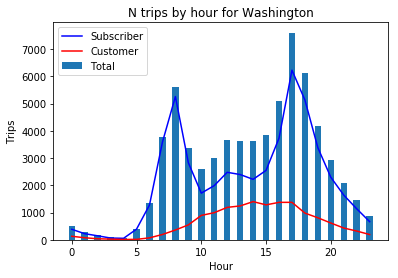

In [90]:
## 使用本框及新框来继续探索数据集。 ##
## 一旦你进行了自己的探索，请写下你的发现 ##
## 请将发现写在上方的 Markdown 框中。       

def trip_load_by_hour(filename, user_type='ALL'):
    """
        return a list of trip number for diff hours by user type
        ALL is default for all type of user
    """
    n_trips = [0]*24
    with open(filename,'r') as file_in:
        reader = csv.DictReader(file_in)
        for row in reader:
            # 只累加指定user_type的骑行数据，ALL表示所有类型
            if user_type == 'ALL' or user_type == row['user_type']: 
                count = n_trips[int(row['hour'])]
                n_trips[int(row['hour'])] = count+1                
    return n_trips

def draw_diagram(n_trips, n_trips_subscriber, n_trips_customer, title):
    x = [i for i in range(24)]
    plt.bar(x, n_trips, width=0.5, label='Total')
    plt.plot(x, n_trips_subscriber, color='b',label='Subscriber')
    plt.plot(x, n_trips_customer, color='r', label='Customer')
    plt.legend(loc='upper left')
    plt.title(title)
    plt.xlabel('Hour')
    plt.ylabel('Trips')
    plt.show()

filename = city_info['Washington']['out_file']
n_trips = trip_load_by_hour(filename)
n_trips_subscriber = trip_load_by_hour(filename, user_type='Subscriber')
n_trips_customer = trip_load_by_hour(filename, user_type='Customer')

draw_diagram(n_trips, n_trips_subscriber, n_trips_customer, 'N trips by hour for Washington')

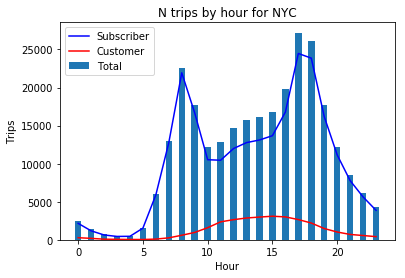

In [91]:
# repeat the same analysis for NYC
filename = city_info['NYC']['out_file']
n_trips = trip_load_by_hour(filename)
n_trips_subscriber = trip_load_by_hour(filename, user_type='Subscriber')
n_trips_customer = trip_load_by_hour(filename, user_type='Customer')

draw_diagram(n_trips, n_trips_subscriber, n_trips_customer, 'N trips by hour for NYC')


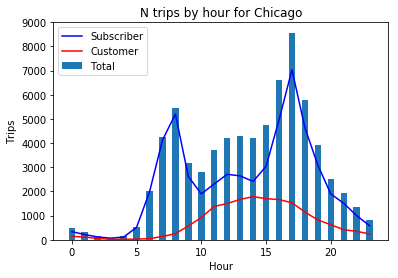

In [92]:
# repeat the same analysis for Chicago
filename = city_info['Chicago']['out_file']
n_trips = trip_load_by_hour(filename)
n_trips_subscriber = trip_load_by_hour(filename, user_type='Subscriber')
n_trips_customer = trip_load_by_hour(filename, user_type='Customer')

draw_diagram(n_trips, n_trips_subscriber, n_trips_customer, 'N trips by hour for Chicago')

<a id='conclusions'></a>
## 结论

恭喜你完成了本项目！这只是数据分析流程的一个样本，囊括了提出问题、整理数据、探索数据三大步骤。通常来讲，数据分析流程进行到这一步，你就可以进行统计检验或为数据拟合模型、得出预测，从而得出结论了。虽然还有许多潜在分析可以进行，但仅靠我们提供的这些数据是不可能完成的。例如，我们没有研究具体的地点数据。最常用的停车点在哪里？最常用的路线是什么？再如，天气也可能对每日骑客量造成很大的影响。下雨或下雪的时候，骑客量会受多大的影响？会员或散客谁更易受天气的影响？

**问题 7**：撇开共享单车数据不谈，想出一个你想应用数据科学技术的课题或领域。对于该课题，你想了解些什么？

**答案**：可以通过分析沪深股市当前/过去的交易量和涨跌幅来预测未来的股市涨跌概率。希望可以了解数据收集，清洗方法，已经机器学习的预测模型。

> **小贴士**：如果我们想同他人分享分析成果，我们也不一定要给他们一份 jupyter Notebook  (.ipynb) 文件的副本，我们可以将 Notebook 的输出结果以某种格式输出，这样一来，就算是没有安装 Python 的人也可以打开文件。在左上方的 **文件** 菜单中找到  **下载为**  子菜单，你可以在其中选择各种更加普遍的格式，比如 HTML (.html) 或 PDF (.pdf)。你可能还需要额外的包或软件来实现这类输出。

> 如果你是通过教室的 Project Notebook 页面来进行本项目的，你也可以直接从工作空间提交本项目。 **但在此之前**，你得执行下方的代码框，为完成好的项目保存一份 HTML 的副本，并将其放到工作空间中。如果操作顺利，输出代码应为 0， 如果你点击左上角的 jupyter 图标，你就会看到工作空间的目录中出现了你的 .html 文件；或者你也可以根据上述段落提及的步骤来下载报告的 .html 格式副本，然后  _上传_ 该报告到目录之中（点击 jupyter 图标来实现这一步）。 

> 无论是哪个办法，一旦你在工作空间中获取了 .html 格式的报告，你就可以点击工作空间右下方的“项目提交”按钮来完成提交。

In [93]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis-zh.ipynb'])

0